### Prophet
<p>
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.  
< br/>
<p>
Prophet utilizes a Bayesian based curve fitting method to forecast the time series data. The cool thing about Prophet is that it doesn’t require much prior knowledge or experience of forecasting time series data since it automatically finds seasonal trends beneath the data and offers a set of ‘easy to understand’ parameters. Hence, it allows non statisticians to start using it and get reasonably good results that are often equal or sometimes even better than the ones produced by the experts.
   
</p>    

In [1]:
# import Prophet
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


#### Fit the model 
<p>
Fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.    
</p>    

In [4]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Make predictions

<p>
Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.
</p>


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [27]:
future


,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


#### Predict method
<p>

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.
</p>

In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206497,7.508922,8.968550
3266,2017-01-16,8.531523,7.784548,9.196926
3267,2017-01-17,8.318930,7.577356,8.953549
3268,2017-01-18,8.151543,7.400773,8.874840
3269,2017-01-19,8.163477,7.381290,8.879131


In [29]:
forecast['yhat']

0       8.844170
1       8.592697
2       8.388514
3       8.366423
4       8.354384
          ...   
3265    8.206497
3266    8.531523
3267    8.318930
3268    8.151543
3269    8.163477
Name: yhat, Length: 3270, dtype: float64

In [30]:
df['y']

0        9.590761
1        8.519590
2        8.183677
3        8.072467
4        7.893572
          ...    
2900     7.817223
2901     9.273878
2902    10.333775
2903     9.125871
2904     8.891374
Name: y, Length: 2905, dtype: float64

#### Plot the forcast
<p>You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

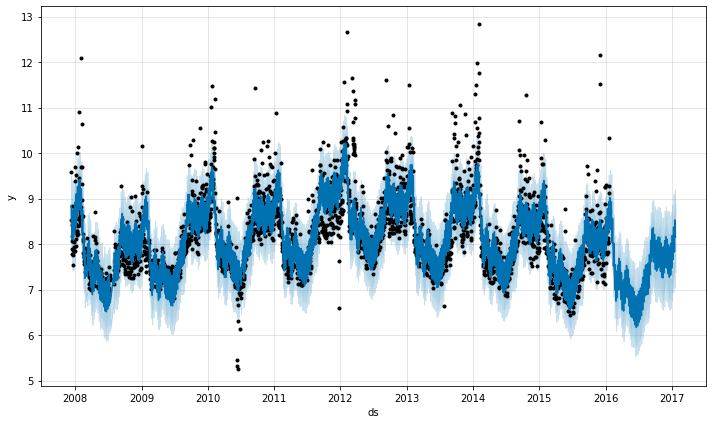

In [31]:
fig1 = m.plot(forecast)


#### More plotting 
<p>
If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
</p>

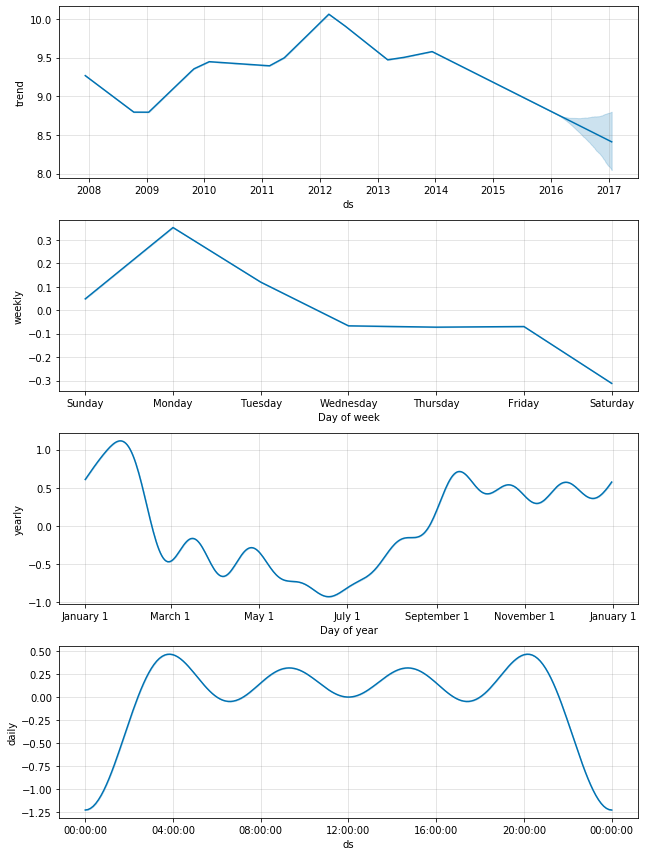

In [10]:
fig2 = m.plot_components(forecast)

### Sub-daily data

<p>
    
Prophet can make forecasts for time series with sub-daily observations by passing in a dataframe with timestamps in the ds column. The format of the timestamps should be YYYY-MM-DD HH:MM:SS - see the example csv here. When sub-daily data are used, daily seasonality will automatically be fit. Here we fit Prophet to data with 5-minute resolution (daily temperatures at Yosemite):    
    
</p>    

In [13]:
# Python
df = pd.read_csv('example_yosemite_temps.csv')
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


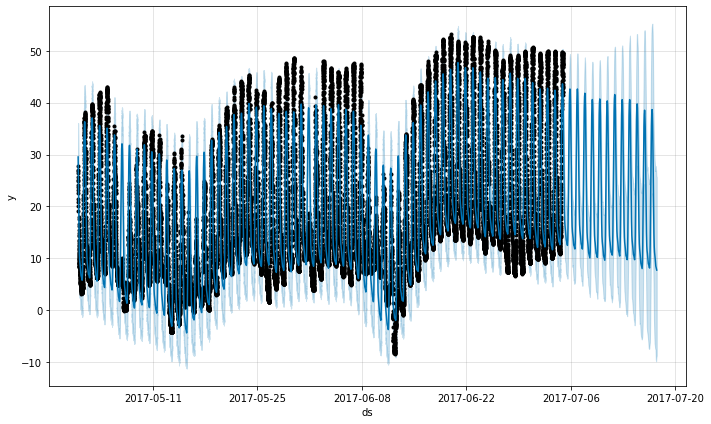

In [12]:
# make forcast and visualize plot
fcst = m.predict(future)
fig = m.plot(fcst)